# Importing Laibraries

In [64]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Load Data

In [65]:
df =pd.read_csv('faults.csv')
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,target
0,42,50.0,270900,270944,267,17,44,24220,76,108,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,Pastry
1,645,651.0,2538079,2538108,108,10,30,11397,84,123,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,Pastry
2,829,835.0,1553913,1553931,71,8,19,7972,99,125,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,Pastry
3,853,860.0,369370,369415,176,13,45,18996,99,126,...,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,Pastry
4,1289,1306.0,498078,498335,2409,60,260,246930,37,126,...,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,Pastry


# Data Cleaning & Preprocessing

In [66]:
df.shape

(1941, 28)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1917 non-null   float64
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1911 non-null   float64
 14  Edges_Index            1941 non-null   float64
 15  Empt

In [68]:
df.isnull().sum()

X_Minimum                 0
X_Maximum                24
Y_Minimum                 0
Y_Maximum                 0
Pixels_Areas              0
X_Perimeter               0
Y_Perimeter               0
Sum_of_Luminosity         0
Minimum_of_Luminosity     0
Maximum_of_Luminosity     0
Length_of_Conveyer        0
TypeOfSteel_A300          0
TypeOfSteel_A400          0
Steel_Plate_Thickness    30
Edges_Index               0
Empty_Index              26
Square_Index              0
Outside_X_Index           0
Edges_X_Index             0
Edges_Y_Index             0
Outside_Global_Index      0
LogOfAreas                0
Log_X_Index               0
Log_Y_Index               0
Orientation_Index         0
Luminosity_Index          0
SigmoidOfAreas            0
target                    0
dtype: int64

# Fill Null Values

In [69]:
df.X_Maximum.fillna(df.X_Maximum.mean(),inplace=True)
df.Steel_Plate_Thickness.fillna(df.Steel_Plate_Thickness.mean(),inplace=True)
df.Empty_Index.fillna(df.Empty_Index.mean(),inplace=True)

In [70]:
df.isnull().sum()

X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
target                   0
dtype: int64

In [71]:
df.duplicated().sum()

0

# Exploratory Data Analysis (EDA)

In [72]:
df.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
count,1941.000000,1941.000000,1.941000e+03,1.941000e+03,1941.000000,1941.000000,1941.000000,1.941000e+03,1941.000000,1941.000000,...,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,571.136012,613.564945,1.650685e+06,1.650739e+06,1893.878413,111.855229,82.965997,2.063121e+05,84.548686,130.193715,...,0.033361,0.610529,0.813472,0.575734,2.492388,1.335686,1.403271,0.083288,-0.131305,0.585420
std,520.690671,493.030581,1.774578e+06,1.774590e+06,5168.459560,301.209187,426.482879,5.122936e+05,32.134276,18.690992,...,0.058961,0.243277,0.234274,0.482352,0.788930,0.481612,0.454345,0.500868,0.148767,0.339452
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,...,0.001500,0.014400,0.048400,0.000000,0.301000,0.301000,0.000000,-0.991000,-0.998900,0.119000
25%,51.000000,193.000000,4.712530e+05,4.712810e+05,84.000000,15.000000,13.000000,9.522000e+03,63.000000,124.000000,...,0.006600,0.411800,0.596800,0.000000,1.924300,1.000000,1.079200,-0.333300,-0.195000,0.248200
50%,435.000000,478.000000,1.204128e+06,1.204136e+06,174.000000,26.000000,25.000000,1.920200e+04,90.000000,127.000000,...,0.010100,0.636400,0.947400,1.000000,2.240600,1.176100,1.322200,0.095200,-0.133000,0.506300
75%,1053.000000,1059.000000,2.183073e+06,2.183084e+06,822.000000,84.000000,83.000000,8.301100e+04,106.000000,140.000000,...,0.023500,0.800000,1.000000,1.000000,2.914900,1.518500,1.732400,0.511600,-0.066600,0.999800
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,...,0.875900,1.000000,1.000000,1.000000,5.183700,3.074100,4.258700,0.991700,0.642100,1.000000


In [73]:
df.corr()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
X_Minimum,1.000000,0.979133,0.041821,0.041807,-0.307322,-0.258937,-0.118757,-0.339045,0.237637,-0.075554,...,-0.361160,0.154778,0.367907,0.147282,-0.428553,-0.437944,-0.326851,0.178585,-0.031578,-0.355251
X_Maximum,0.979133,1.000000,0.053694,0.053682,-0.224449,-0.185271,-0.089694,-0.245972,0.171679,-0.053363,...,-0.212675,0.151882,0.267171,0.091397,-0.329848,-0.319423,-0.265670,0.108930,-0.031092,-0.282935
Y_Minimum,0.041821,0.053694,1.000000,1.000000,0.017670,0.023843,0.024150,0.007362,-0.065703,-0.067785,...,0.054165,0.066085,-0.036543,-0.062911,0.044952,0.070406,-0.008442,-0.086497,-0.090654,0.025257
Y_Maximum,0.041807,0.053682,1.000000,1.000000,0.017840,0.024038,0.024380,0.007499,-0.065733,-0.067776,...,0.054185,0.066051,-0.036549,-0.062901,0.044994,0.070432,-0.008382,-0.086480,-0.090666,0.025284
Pixels_Areas,-0.307322,-0.224449,0.017670,0.017840,1.000000,0.966644,0.827199,0.978952,-0.497204,0.110063,...,0.588606,-0.294673,-0.463571,-0.109655,0.650234,0.603072,0.578342,-0.137604,-0.043449,0.422947
X_Perimeter,-0.258937,-0.185271,0.023843,0.024038,0.966644,1.000000,0.912436,0.912956,-0.400427,0.111363,...,0.517098,-0.293039,-0.412100,-0.079106,0.563036,0.524716,0.523472,-0.101731,-0.032617,0.380605
Y_Perimeter,-0.118757,-0.089694,0.024150,0.024380,0.827199,0.912436,1.000000,0.704876,-0.213758,0.061809,...,0.209160,-0.195162,-0.136723,0.013438,0.294040,0.228485,0.344378,0.031381,-0.047778,0.191772
Sum_of_Luminosity,-0.339045,-0.245972,0.007362,0.007499,0.978952,0.912956,0.704876,1.000000,-0.540566,0.136515,...,0.658339,-0.327728,-0.529745,-0.121090,0.712128,0.667736,0.618795,-0.158483,-0.014067,0.464248
Minimum_of_Luminosity,0.237637,0.171679,-0.065703,-0.065733,-0.497204,-0.400427,-0.213758,-0.540566,1.000000,0.429605,...,-0.487574,0.252256,0.316610,0.035462,-0.678762,-0.567655,-0.588208,0.057123,0.669534,-0.514797
Maximum_of_Luminosity,-0.075554,-0.053363,-0.067785,-0.067776,0.110063,0.111363,0.061809,0.136515,0.429605,1.000000,...,0.099300,0.093522,-0.167441,-0.124039,0.007672,0.092823,-0.069522,-0.169747,0.870160,-0.039651


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   float64
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   float64
 14  Edges_Index            1941 non-null   float64
 15  Empt

In [75]:
df.TypeOfSteel_A300.value_counts()

0    1164
1     777
Name: TypeOfSteel_A300, dtype: int64

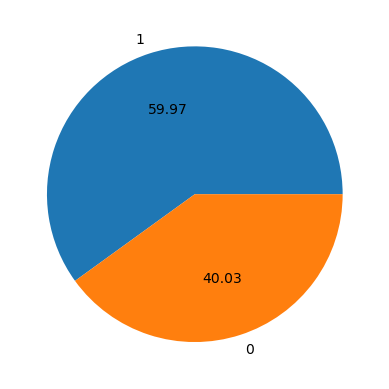

In [76]:
plt.pie(df.TypeOfSteel_A300.value_counts(),labels=['1','0'],autopct='%0.2f')
plt.show()

In [77]:
df.TypeOfSteel_A400.value_counts()

1    1164
0     777
Name: TypeOfSteel_A400, dtype: int64

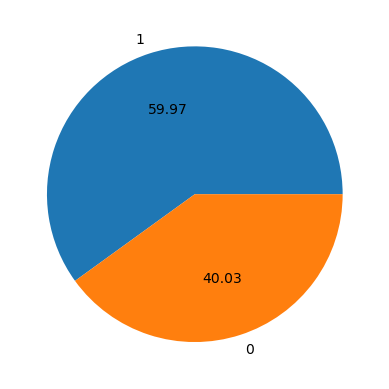

In [78]:
plt.pie(df.TypeOfSteel_A400.value_counts(),labels=['1','0'],autopct='%0.2f')
plt.show()

In [79]:
df.Outside_Global_Index.value_counts()

1.0    1072
0.0     778
0.5      91
Name: Outside_Global_Index, dtype: int64

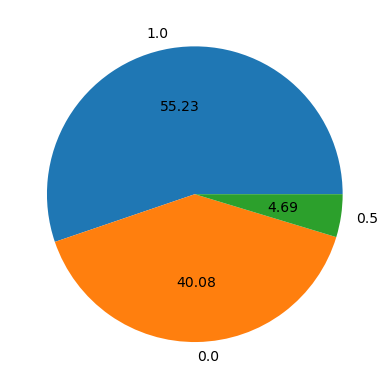

In [80]:
plt.pie(df.Outside_Global_Index.value_counts(),labels=['1.0','0.0','0.5'],autopct='%0.2f')
plt.show()

In [81]:
df.target.value_counts()

Other_Faults    673
Bumps           402
K_Scatch        391
Z_Scratch       190
Pastry          158
Stains           72
Dirtiness        55
Name: target, dtype: int64

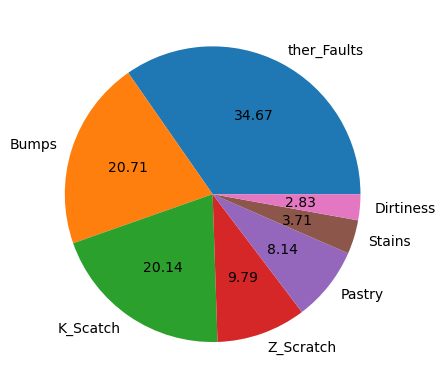

In [82]:
plt.pie(df.target.value_counts(),labels=['ther_Faults','Bumps','K_Scatch','Z_Scratch','Pastry','Stains','Dirtiness'],autopct='%0.2f')
plt.show()

<AxesSubplot:xlabel='target', ylabel='count'>

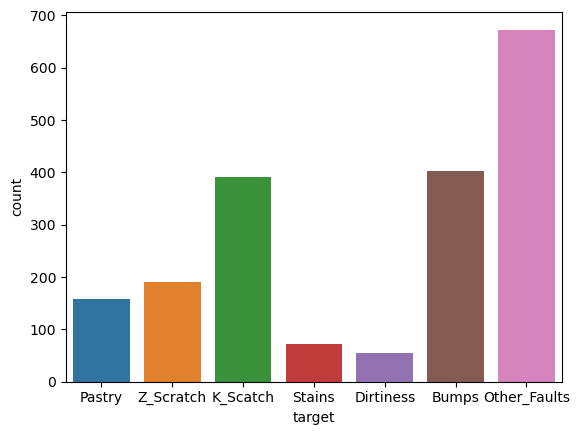

In [83]:
sns.countplot(data=df,x='target')

# Data Encoding

In [84]:
le=LabelEncoder()

In [85]:
df.target=le.fit_transform(df.target)

In [86]:
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,target
0,42,50.0,270900,270944,267,17,44,24220,76,108,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,4
1,645,651.0,2538079,2538108,108,10,30,11397,84,123,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,4
2,829,835.0,1553913,1553931,71,8,19,7972,99,125,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,4
3,853,860.0,369370,369415,176,13,45,18996,99,126,...,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,4
4,1289,1306.0,498078,498335,2409,60,260,246930,37,126,...,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,4


# Data Seperation

In [87]:
x=df.drop('target',axis=1)
y=df.target

In [88]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

# Data Standardization

In [89]:
scalar=StandardScaler()

In [90]:
x_train=scalar.fit_transform(x_train)
x_test=scalar.fit_transform(x_test)

# Data Modeling

In [95]:
model=tf.keras.Sequential([
   
    tf.keras.layers.InputLayer(input_shape= x_train.shape[1:]),
    
    tf.keras.layers.Dense(64,activation='leaky_relu'),
    tf.keras.layers.Dense(32,activation='leaky_relu'),
    tf.keras.layers.Dense(16,activation='leaky_relu'),
    tf.keras.layers.Dense(8,activation='leaky_relu'),
    
    tf.keras.layers.Dense(7,activation='softmax')

])

In [96]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [97]:
early_stopping=EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

In [98]:
history=model.fit(x_train,y_train,epochs=25, verbose=1,validation_split=0.1,callbacks=[early_stopping])

Epoch 1/25
50/50 [==============================] - 1s 6ms/step - loss: 1.6960 - accuracy: 0.2928 - val_loss: 1.5012 - val_accuracy: 0.3771
Epoch 2/25
50/50 [==============================] - 0s 2ms/step - loss: 1.3208 - accuracy: 0.5130 - val_loss: 1.2056 - val_accuracy: 0.5714
Epoch 3/25
50/50 [==============================] - 0s 2ms/step - loss: 1.0956 - accuracy: 0.6003 - val_loss: 1.0571 - val_accuracy: 0.6457
Epoch 4/25
50/50 [==============================] - 0s 2ms/step - loss: 0.9494 - accuracy: 0.6626 - val_loss: 0.8982 - val_accuracy: 0.6743
Epoch 5/25
50/50 [==============================] - 0s 2ms/step - loss: 0.8421 - accuracy: 0.6677 - val_loss: 0.8279 - val_accuracy: 0.7029
Epoch 6/25
50/50 [==============================] - 0s 2ms/step - loss: 0.7695 - accuracy: 0.7021 - val_loss: 0.7868 - val_accuracy: 0.7143
Epoch 7/25
50/50 [==============================] - 0s 2ms/step - loss: 0.7336 - accuracy: 0.7167 - val_loss: 0.7725 - val_accuracy: 0.7371
Epoch 8/25
50/50 [==

# Graph Representation of Loss & accuracy

### 1.Loss

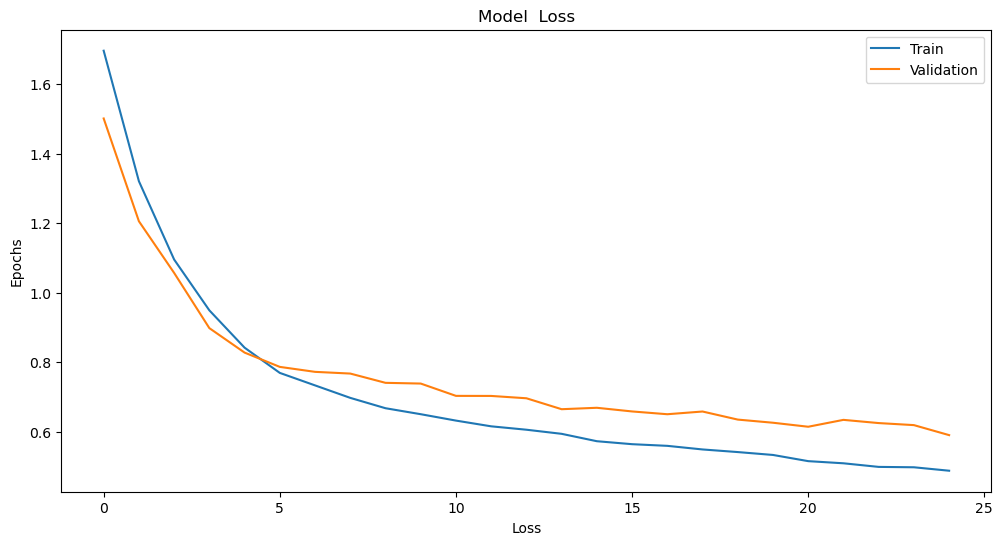

In [100]:
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model  Loss")
plt.xlabel("Loss")
plt.ylabel("Epochs")
plt.legend(['Train','Validation'], loc='upper right')
plt.show()

### 2. Accuracy

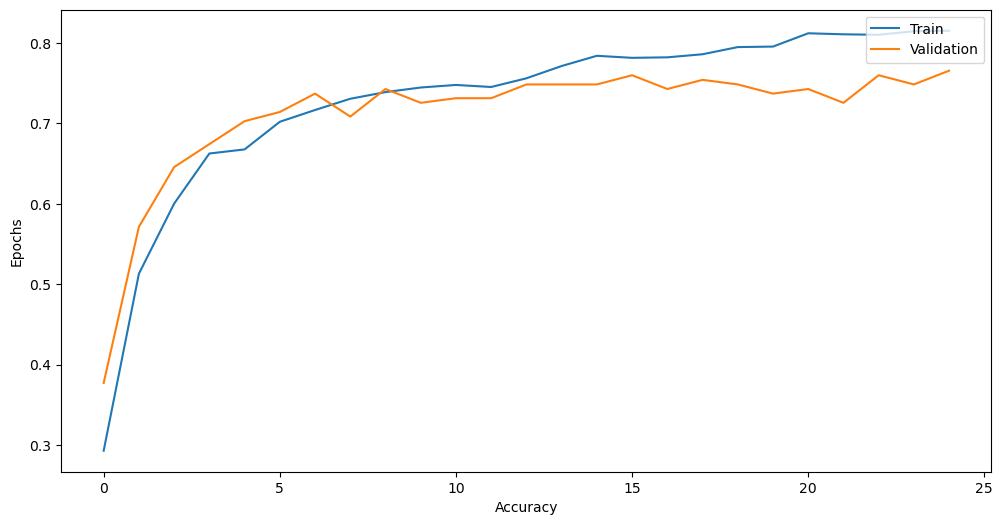

In [101]:
plt.figure(figsize=(12,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Accuracy')
plt.ylabel('Epochs')
plt.legend(['Train','Validation'], loc='upper right')
plt.show()

# Evaluation of Loss & Accuracy On Test Data

In [102]:
loss,accuracy=model.evaluate(x_test,y_test)
print(f"Test Loss:{loss}")
print(f"Text Accuracy:{accuracy}")

7/7 [==============================] - 0s 2ms/step - loss: 0.6432 - accuracy: 0.7487
Test Loss:0.6432475447654724
Text Accuracy:0.7487179636955261
